# Task
Analyze the data in "/content/synthetic_coffee_health_10000.csv" using supervised learning methods. If the target variable is categorical, use Support Vector Classifier and at least one other classification method (Random Forest, KNN, Naive Bayes, etc.). If the target variable is numerical, use Linear Regression and at least one other regression method (Support Vector Regressor, etc.). Evaluate classification models using Confusion Matrix and Classification Report, and regression models using MAE, MSE, RMSE, and R2-Score. Provide explanations for all evaluation metrics. Create informative plots to visualize the prediction results, including plotting predicted vs. actual target values for regression. Include all explanations and analysis in markdown cells in Indonesian.

## Memuat data

### Subtask:
Muat dataset dari `/content/synthetic_coffee_health_10000.csv` ke dalam pandas DataFrame.


**Reasoning**:
Impor library pandas, muat data dari file CSV ke dalam DataFrame, dan tampilkan beberapa baris pertama untuk verifikasi.



In [1]:
import pandas as pd

df = pd.read_csv('/content/synthetic_coffee_health_10000.csv')
display(df.head())

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


## Eksplorasi data awal

### Subtask:
Lakukan eksplorasi data awal untuk memahami struktur data, tipe kolom, dan distribusi target variabel. Tentukan apakah ini tugas klasifikasi (target kategorikal) atau regresi (target numerik).


**Reasoning**:
Lakukan eksplorasi data awal untuk memahami struktur data, tipe kolom, dan distribusi target variabel. Tampilkan informasi ringkasan, statistik deskriptif, dan periksa distribusi kolom target potensial.



In [2]:
df.info()
display(df.describe())
print("\nValue counts for 'Health_Issues':")
print(df['Health_Issues'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000



Value counts for 'Health_Issues':
Health_Issues
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64


## Pra-pemrosesan data

### Subtask:
Lakukan pra-pemrosesan data yang diperlukan seperti penanganan nilai yang hilang, encoding variabel kategorikal (jika ada), dan penskalaan fitur.


**Reasoning**:
Identify columns with missing values and handle them, identify categorical variables and encode them, and identify numerical features and scale them.



In [3]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# 1. Handle missing values
# Identify columns with missing values
missing_cols = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", missing_cols)

# Strategy: Impute 'Health_Issues' (categorical) with the most frequent value
# Impute numerical columns with the mean (assuming others might have missing values too, though not shown in info)
categorical_features_with_missing = ['Health_Issues']
numerical_features_with_missing = [col for col in missing_cols if col not in categorical_features_with_missing]

# 2. Identify categorical and numerical variables for encoding and scaling
categorical_features = ['Gender', 'Country', 'Occupation', 'Smoking', 'Alcohol_Consumption']
numerical_features = ['Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours']

# Separate target variable
X = df.drop('Health_Issues', axis=1)
y = df['Health_Issues']

# Create transformers for preprocessing
# Imputation for categorical features with missing values
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Imputation for numerical features with missing values
numerical_imputer = SimpleImputer(strategy='mean')

# One-Hot Encoding for categorical features (excluding the target)
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# Scaling for numerical features
scaler = StandardScaler()

# Create a column transformer to apply different transformations to different columns
# Handle missing values first within the transformer or with separate steps before
preprocessor = ColumnTransformer(
    transformers=[
        ('cat_impute', categorical_imputer, categorical_features_with_missing),
        ('num_impute', numerical_imputer, numerical_features_with_missing),
        ('onehot', one_hot_encoder, categorical_features),
        ('scaler', scaler, numerical_features)
    ],
    remainder='passthrough' # Keep other columns (like ID) - though ID should likely be dropped for modeling
)

# Apply the preprocessing
# Fit and transform the features
X_processed = preprocessor.fit_transform(X)

# For the target variable, we need to handle missing values and potentially encode it later if it's categorical and
# the model requires numerical labels. For SVC and Random Forest, string labels are often fine.
# Handle missing values in the target variable
y_imputed = y.fillna(y.mode()[0])

# Display the shape of the processed features
print("\nShape of processed features (X_processed):", X_processed.shape)

# Display the first row of the processed features (optional, for verification)
# Note: This will be a numpy array after transformation
# print("\nFirst row of processed features:\n", X_processed[0])

# You can also get the feature names after one-hot encoding if needed
# new_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_features)
# print("\nNew feature names after One-Hot Encoding:", new_feature_names)


Columns with missing values: ['Health_Issues']


ValueError: A given column is not a column of the dataframe

**Reasoning**:
The previous code failed because `Health_Issues` was included in `numerical_features_with_missing` even though it was dropped from `X`. The `ColumnTransformer` expects the columns specified in the transformers to be present in the input DataFrame `X`. The column `Health_Issues` was correctly identified as having missing values, but it should be handled separately as the target variable `y`, not as a feature in `X` to be imputed within the feature processing pipeline. The `ID` column should also be excluded from feature processing. The fix is to remove `Health_Issues` from the features lists used in the `ColumnTransformer` and handle its imputation on the target variable `y` separately. Additionally, remove `ID` from features.



In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Identify columns with missing values
missing_cols = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", missing_cols)

# Separate target variable
X = df.drop(['Health_Issues', 'ID'], axis=1) # Drop ID as it's not a feature
y = df['Health_Issues']

# Handle missing values in the target variable
# Impute 'Health_Issues' (categorical) with the most frequent value
y_imputed = y.fillna(y.mode()[0])

# Identify categorical and numerical variables for encoding and scaling in the feature set X
# Exclude 'Health_Issues' and 'ID'
categorical_features = ['Gender', 'Country', 'Occupation', 'Smoking', 'Alcohol_Consumption']
numerical_features = ['Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours']

# Create transformers for preprocessing the features (X)
# One-Hot Encoding for categorical features
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# Scaling for numerical features
scaler = StandardScaler()

# Create a column transformer to apply different transformations to different columns in X
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', one_hot_encoder, categorical_features),
        ('scaler', scaler, numerical_features)
    ],
    remainder='passthrough' # This will keep any other columns, but we've dropped 'ID', so it's fine.
)

# Apply the preprocessing to the features X
# Fit and transform the features
X_processed = preprocessor.fit_transform(X)

# Display the shape of the processed features
print("\nShape of processed features (X_processed):", X_processed.shape)

# Display the first row of the processed features (optional, for verification)
# print("\nFirst row of processed features:\n", X_processed[0])

# The preprocessed features are now in X_processed and the target variable is in y_imputed


Columns with missing values: ['Health_Issues']

Shape of processed features (X_processed): (10000, 41)


## Pembagian data

### Subtask:
Bagi data menjadi set pelatihan dan pengujian.


**Reasoning**:
Bagi fitur yang telah diproses dan target yang telah diimputasi menjadi set pelatihan dan pengujian, lalu cetak bentuknya untuk verifikasi.



In [5]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_imputed, test_size=0.2, random_state=42, stratify=y_imputed
)

# Cetak bentuk dari set pelatihan dan pengujian
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8000, 41)
Shape of X_test: (2000, 41)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


## Implementasi model supervised learning

### Subtask:
Implementasikan Support Vector Classifier dan satu atau lebih model klasifikasi lainnya (Random Forest, KNN, Naive Bayes, dll.).


**Reasoning**:
Impor kelas model klasifikasi yang akan digunakan, inisialisasi instance dari masing-masing model, dan simpan instance model dalam variabel.



In [6]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi instance model klasifikasi
svc_model = SVC(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()

print("Model klasifikasi telah diinisialisasi:")
print("- Support Vector Classifier (svc_model)")
print("- Random Forest Classifier (rf_model)")
print("- K-Nearest Neighbors (knn_model)")

Model klasifikasi telah diinisialisasi:
- Support Vector Classifier (svc_model)
- Random Forest Classifier (rf_model)
- K-Nearest Neighbors (knn_model)


## Pelatihan model

### Subtask:
Latih model yang dipilih menggunakan set pelatihan.


**Reasoning**:
Train the initialized classification models using the training data.



In [7]:
# Train the Support Vector Classifier model
svc_model.fit(X_train, y_train)
print("Support Vector Classifier model trained.")

# Train the Random Forest Classifier model
rf_model.fit(X_train, y_train)
print("Random Forest Classifier model trained.")

# Train the K-Nearest Neighbors model
knn_model.fit(X_train, y_train)
print("K-Nearest Neighbors model trained.")

ValueError: could not convert string to float: 'Good'

**Reasoning**:
The error indicates that there are still non-numeric values in the training data (X_train) that the models cannot process. Although the previous preprocessing step was intended to handle this, it seems something was missed or went wrong. I need to re-examine the preprocessing and ensure all categorical features are properly encoded and all numerical features are scaled. I will regenerate the preprocessing pipeline to fix this issue and then retry training the models.



In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Re-create the original DataFrame to apply preprocessing again
# Assuming df is still available from the previous steps
X = df.drop(['Health_Issues', 'ID'], axis=1) # Drop ID as it's not a feature
y = df['Health_Issues']

# Handle missing values in the target variable
# Impute 'Health_Issues' (categorical) with the most frequent value
y_imputed = y.fillna(y.mode()[0])

# Identify categorical and numerical variables for encoding and scaling in the feature set X
# Exclude 'Health_Issues' and 'ID'
categorical_features = ['Gender', 'Country', 'Occupation', 'Smoking', 'Alcohol_Consumption']
numerical_features = ['Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours']

# Verify if there are any other object type columns that might contain strings
object_cols = X.select_dtypes(include='object').columns.tolist()
print("Object columns in X before preprocessing:", object_cols)


# Create transformers for preprocessing the features (X)
# One-Hot Encoding for categorical features
# Handle unknown 'ignore' is important if test set has categories not in train set
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# Scaling for numerical features
scaler = StandardScaler()

# Create a column transformer to apply different transformations to different columns in X
# Ensure only the identified categorical and numerical features are processed
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', one_hot_encoder, categorical_features),
        ('scaler', scaler, numerical_features)
    ],
    remainder='passthrough' # This should ideally not have any columns left if we've identified all relevant types
)

# Create a pipeline that first preprocesses and then trains the models
# This ensures preprocessing is applied correctly within the pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Split data again using the potentially re-created X and y_imputed
X_train, X_test, y_train, y_test = train_test_split(
    X, y_imputed, test_size=0.2, random_state=42, stratify=y_imputed
)


# Create pipelines for each model, including the preprocessor
pipeline_svc = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', SVC(random_state=42))])

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])

# Train the models using the pipelines
pipeline_svc.fit(X_train, y_train)
print("Support Vector Classifier model trained.")

pipeline_rf.fit(X_train, y_train)
print("Random Forest Classifier model trained.")

pipeline_knn.fit(X_train, y_train)
print("K-Nearest Neighbors model trained.")


Object columns in X before preprocessing: ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Occupation']


ValueError: could not convert string to float: 'Good'

**Reasoning**:
The error persists because the 'Sleep_Quality' and 'Stress_Level' columns, which are of object type and contain string values, were not included in the list of categorical features to be one-hot encoded. I need to update the `categorical_features` list to include these columns and then re-run the pipeline training.



In [9]:
# Update the list of categorical features to include 'Sleep_Quality' and 'Stress_Level'
categorical_features = ['Gender', 'Country', 'Occupation', 'Smoking', 'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level']
numerical_features = ['Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours']


# Create transformers for preprocessing the features (X)
# One-Hot Encoding for categorical features
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# Scaling for numerical features
scaler = StandardScaler()

# Create a column transformer to apply different transformations to different columns in X
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', one_hot_encoder, categorical_features),
        ('scaler', scaler, numerical_features)
    ],
    remainder='passthrough' # This should ideally not have any columns left if we've identified all relevant types
)

# Create a pipeline that first preprocesses and then trains the models
# This ensures preprocessing is applied correctly within the pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Assuming X and y_imputed are still available from previous steps
# Split data again using the potentially re-created X and y_imputed
X_train, X_test, y_train, y_test = train_test_split(
    X, y_imputed, test_size=0.2, random_state=42, stratify=y_imputed
)


# Create pipelines for each model, including the preprocessor
pipeline_svc = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', SVC(random_state=42))])

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])

# Train the models using the pipelines
pipeline_svc.fit(X_train, y_train)
print("Support Vector Classifier model trained.")

pipeline_rf.fit(X_train, y_train)
print("Random Forest Classifier model trained.")

pipeline_knn.fit(X_train, y_train)
print("K-Nearest Neighbors model trained.")

Support Vector Classifier model trained.
Random Forest Classifier model trained.
K-Nearest Neighbors model trained.


## Evaluasi model

### Subtask:
Evaluasi model klasifikasi menggunakan Confusion Matrix dan Classification Report, serta berikan penjelasan untuk setiap metrik evaluasi.


**Reasoning**:
Use the trained model pipelines to make predictions on the test set and then calculate and print the confusion matrix and classification report for each model.



In [10]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
y_pred_svc = pipeline_svc.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_knn = pipeline_knn.predict(X_test)

# Evaluate Support Vector Classifier
print("--- Support Vector Classifier ---")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))

# Evaluate Random Forest Classifier
print("--- Random Forest Classifier ---")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Evaluate K-Nearest Neighbors
print("--- K-Nearest Neighbors ---")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

--- Support Vector Classifier ---
Confusion Matrix:
[[1900    4    0]
 [  40   53    0]
 [   0    3    0]]

Classification Report:
              precision    recall  f1-score   support

        Mild       0.98      1.00      0.99      1904
    Moderate       0.88      0.57      0.69        93
      Severe       0.00      0.00      0.00         3

    accuracy                           0.98      2000
   macro avg       0.62      0.52      0.56      2000
weighted avg       0.97      0.98      0.97      2000

--- Random Forest Classifier ---
Confusion Matrix:
[[1900    4    0]
 [   2   91    0]
 [   0    2    1]]

Classification Report:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        Mild       1.00      1.00      1.00      1904
    Moderate       0.94      0.98      0.96        93
      Severe       1.00      0.33      0.50         3

    accuracy                           1.00      2000
   macro avg       0.98      0.77      0.82      2000
weighted avg       1.00      1.00      1.00      2000

--- K-Nearest Neighbors ---
Confusion Matrix:
[[1901    3    0]
 [  69   24    0]
 [   2    1    0]]

Classification Report:
              precision    recall  f1-score   support

        Mild       0.96      1.00      0.98      1904
    Moderate       0.86      0.26      0.40        93
      Severe       0.00      0.00      0.00         3

    accuracy                           0.96      2000
   macro avg       0.61      0.42      0.46      2000
weighted avg       0.96      0.96      0.95      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Reasoning**:
Add a markdown cell to provide explanations for the evaluation metrics used in the confusion matrix and classification report in Indonesian.



In [11]:
# This is a placeholder cell for adding a markdown explanation in the next turn.
# The markdown explanation will cover Confusion Matrix and Classification Report metrics.

**Reasoning**:
Provide detailed explanations for the Confusion Matrix and Classification Report metrics in Indonesian as requested by the instructions.



In [12]:
# This is a placeholder cell for the markdown explanation.
# Please add the markdown content directly into this cell.

**Reasoning**:
Provide the detailed explanation of the evaluation metrics in Indonesian using a markdown cell.



In [13]:
%%markdown
## Penjelasan Metrik Evaluasi Klasifikasi

Setelah melatih dan menguji model klasifikasi, kita menggunakan beberapa metrik evaluasi untuk memahami seberapa baik kinerja model dalam memprediksi kategori "Health_Issues". Dua alat utama yang kita gunakan adalah **Confusion Matrix** dan **Classification Report**.

### Confusion Matrix

Confusion Matrix (Matriks Kebingungan) adalah tabel yang meringkas kinerja model klasifikasi pada set data uji. Tabel ini menunjukkan jumlah prediksi yang benar dan salah yang dibuat oleh model untuk setiap kelas. Struktur dasar untuk masalah klasifikasi biner (dua kelas) adalah sebagai berikut:

|                | Diprediksi Positif | Diprediksi Negatif |
|----------------|--------------------|--------------------|
| **Aktual Positif** | True Positive (TP) | False Negative (FN)|
| **Aktual Negatif** | False Positive (FP)| True Negative (TN) |

Untuk masalah klasifikasi multi-kelas seperti kita (Mild, Moderate, Severe), matriksnya akan lebih besar, dengan baris mewakili kelas aktual dan kolom mewakili kelas yang diprediksi. Angka di sel $(i, j)$ menunjukkan jumlah sampel dari kelas aktual $i$ yang diprediksi sebagai kelas $j$.

Berikut adalah penjelasan untuk setiap komponen dalam Confusion Matrix:

*   **True Positives (TP):** Jumlah sampel yang sebenarnya positif dan diprediksi dengan benar sebagai positif. Dalam konteks kita, ini adalah jumlah orang dengan tingkat kesehatan tertentu (misalnya, Moderate) yang diprediksi dengan benar sebagai Moderate.
*   **True Negatives (TN):** Jumlah sampel yang sebenarnya negatif dan diprediksi dengan benar sebagai negatif. Dalam masalah multi-kelas, konsep "negatif" biasanya berkaitan dengan "bukan kelas tertentu". Misalnya, untuk kelas 'Mild', TN adalah jumlah orang yang sebenarnya *bukan* 'Mild' dan diprediksi *bukan* 'Mild'.
*   **False Positives (FP):** (Kesalahan Tipe I) Jumlah sampel yang sebenarnya negatif tetapi diprediksi salah sebagai positif. Dalam konteks kita, ini adalah jumlah orang yang sebenarnya memiliki tingkat kesehatan yang lebih rendah (misalnya, Mild) tetapi diprediksi sebagai tingkat kesehatan yang lebih tinggi (misalnya, Moderate atau Severe). Ini juga dikenal sebagai kesalahan "Type I error".
*   **False Negatives (FN):** (Kesalahan Tipe II) Jumlah sampel yang sebenarnya positif tetapi diprediksi salah sebagai negatif. Dalam konteks kita, ini adalah jumlah orang yang sebenarnya memiliki tingkat kesehatan tertentu (misalnya, Moderate) tetapi diprediksi sebagai tingkat kesehatan yang lebih rendah atau berbeda (misalnya, Mild atau Severe). Ini juga dikenal sebagai kesalahan "Type II error".

Melihat Confusion Matrix memungkinkan kita untuk memahami jenis kesalahan apa yang paling sering dilakukan model. Misalnya, apakah model cenderung salah mengklasifikasikan tingkat kesehatan Moderate sebagai Mild (FN untuk Moderate) atau sebaliknya (FP untuk Mild)?

### Classification Report

Classification Report (Laporan Klasifikasi) menyediakan ringkasan metrik evaluasi utama untuk setiap kelas, serta rata-rata global. Metrik utama yang disertakan adalah:

*   **Precision (Presisi):** Rasio TP terhadap total prediksi positif (TP + FP). Precision menjawab pertanyaan: "Dari semua sampel yang diprediksi sebagai kelas tertentu, berapa banyak yang sebenarnya milik kelas tersebut?". Precision yang tinggi berarti model memiliki sedikit False Positives.
    $$ \text{Precision} = \frac{TP}{TP + FP} $$
    *Dalam konteks kita:* Presisi untuk kelas 'Moderate' menunjukkan proporsi orang yang diprediksi memiliki 'Moderate' yang sebenarnya memang memiliki 'Moderate'.

*   **Recall (Sensitivity atau True Positive Rate):** Rasio TP terhadap total sampel aktual positif (TP + FN). Recall menjawab pertanyaan: "Dari semua sampel yang sebenarnya milik kelas tertentu, berapa banyak yang berhasil diprediksi oleh model?". Recall yang tinggi berarti model memiliki sedikit False Negatives.
    $$ \text{Recall} = \frac{TP}{TP + FN} $$
    *Dalam konteks kita:* Recall untuk kelas 'Moderate' menunjukkan proporsi orang yang sebenarnya memiliki 'Moderate' yang berhasil diidentifikasi oleh model sebagai 'Moderate'.

*   **F1-Score:** Rata-rata harmonis dari Precision dan Recall. F1-score berguna ketika ada ketidakseimbangan antara Precision dan Recall. F1-score mencapai nilai terbaiknya pada 1 (presisi dan recall sempurna) dan terburuk pada 0.
    $$ \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$
    *Dalam konteks kita:* F1-score memberikan ukuran tunggal yang menyeimbangkan Presisi dan Recall untuk setiap tingkat kesehatan.

*   **Support:** Jumlah sampel aktual dalam kelas ini di set data uji. Ini adalah jumlah baris dalam Confusion Matrix untuk kelas tersebut.
    *Dalam konteks kita:* Support untuk kelas 'Severe' misalnya, menunjukkan berapa banyak orang di set pengujian yang sebenarnya memiliki 'Severe Health Issues'.

*   **Accuracy (Akurasi):** Meskipun tidak secara eksplisit ada sebagai baris terpisah untuk setiap kelas di Classification Report, akurasi total disediakan di bagian bawah. Akurasi adalah rasio prediksi yang benar (TP + TN) terhadap total jumlah sampel.
    $$ \text{Accuracy} = \frac{TP + TN}{TP + FP + FN + TN} $$
    *Dalam konteks kita:* Akurasi keseluruhan menunjukkan proporsi orang di set pengujian yang prediksinya (untuk tingkat kesehatan Mild, Moderate, atau Severe) benar. Namun, penting untuk dicatat bahwa akurasi bisa menyesatkan pada dataset dengan kelas yang sangat tidak seimbang (seperti yang kita miliki, di mana kelas 'Mild' jauh lebih dominan), karena model mungkin mencapai akurasi tinggi hanya dengan memprediksi kelas mayoritas. Oleh karena itu, melihat Precision, Recall, dan F1-score per kelas, terutama untuk kelas minoritas ('Moderate' dan 'Severe'), sangat penting.

*   **Macro Avg:** Rata-rata unweighted dari metrik (Precision, Recall, F1-score) untuk semua kelas. Ini memperlakukan semua kelas sama, terlepas dari jumlah sampelnya.
*   **Weighted Avg:** Rata-rata weighted dari metrik (Precision, Recall, F1-score) untuk semua kelas, di mana bobotnya adalah support (jumlah sampel) untuk setiap kelas. Ini memberikan skor yang lebih mencerminkan kinerja pada dataset secara keseluruhan, dengan kelas mayoritas memiliki dampak lebih besar.

Dengan memeriksa metrik-metrik ini, terutama Precision, Recall, dan F1-score untuk setiap kelas, kita dapat mengevaluasi kinerja model dengan lebih nuansa, melampaui hanya melihat akurasi total, terutama ketika berhadapan dengan ketidakseimbangan kelas.

## Penjelasan Metrik Evaluasi Klasifikasi

Setelah melatih dan menguji model klasifikasi, kita menggunakan beberapa metrik evaluasi untuk memahami seberapa baik kinerja model dalam memprediksi kategori "Health_Issues". Dua alat utama yang kita gunakan adalah **Confusion Matrix** dan **Classification Report**.

### Confusion Matrix

Confusion Matrix (Matriks Kebingungan) adalah tabel yang meringkas kinerja model klasifikasi pada set data uji. Tabel ini menunjukkan jumlah prediksi yang benar dan salah yang dibuat oleh model untuk setiap kelas. Struktur dasar untuk masalah klasifikasi biner (dua kelas) adalah sebagai berikut:

|                | Diprediksi Positif | Diprediksi Negatif |
|----------------|--------------------|--------------------|
| **Aktual Positif** | True Positive (TP) | False Negative (FN)|
| **Aktual Negatif** | False Positive (FP)| True Negative (TN) |

Untuk masalah klasifikasi multi-kelas seperti kita (Mild, Moderate, Severe), matriksnya akan lebih besar, dengan baris mewakili kelas aktual dan kolom mewakili kelas yang diprediksi. Angka di sel $(i, j)$ menunjukkan jumlah sampel dari kelas aktual $i$ yang diprediksi sebagai kelas $j$.

Berikut adalah penjelasan untuk setiap komponen dalam Confusion Matrix:

*   **True Positives (TP):** Jumlah sampel yang sebenarnya positif dan diprediksi dengan benar sebagai positif. Dalam konteks kita, ini adalah jumlah orang dengan tingkat kesehatan tertentu (misalnya, Moderate) yang diprediksi dengan benar sebagai Moderate.
*   **True Negatives (TN):** Jumlah sampel yang sebenarnya negatif dan diprediksi dengan benar sebagai negatif. Dalam masalah multi-kelas, konsep "negatif" biasanya berkaitan dengan "bukan kelas tertentu". Misalnya, untuk kelas 'Mild', TN adalah jumlah orang yang sebenarnya *bukan* 'Mild' dan diprediksi *bukan* 'Mild'.
*   **False Positives (FP):** (Kesalahan Tipe I) Jumlah sampel yang sebenarnya negatif tetapi diprediksi salah sebagai positif. Dalam konteks kita, ini adalah jumlah orang yang sebenarnya memiliki tingkat kesehatan yang lebih rendah (misalnya, Mild) tetapi diprediksi sebagai tingkat kesehatan yang lebih tinggi (misalnya, Moderate atau Severe). Ini juga dikenal sebagai kesalahan "Type I error".
*   **False Negatives (FN):** (Kesalahan Tipe II) Jumlah sampel yang sebenarnya positif tetapi diprediksi salah sebagai negatif. Dalam konteks kita, ini adalah jumlah orang yang sebenarnya memiliki tingkat kesehatan tertentu (misalnya, Moderate) tetapi diprediksi sebagai tingkat kesehatan yang lebih rendah atau berbeda (misalnya, Mild atau Severe). Ini juga dikenal sebagai kesalahan "Type II error".

Melihat Confusion Matrix memungkinkan kita untuk memahami jenis kesalahan apa yang paling sering dilakukan model. Misalnya, apakah model cenderung salah mengklasifikasikan tingkat kesehatan Moderate sebagai Mild (FN untuk Moderate) atau sebaliknya (FP untuk Mild)?

### Classification Report

Classification Report (Laporan Klasifikasi) menyediakan ringkasan metrik evaluasi utama untuk setiap kelas, serta rata-rata global. Metrik utama yang disertakan adalah:

*   **Precision (Presisi):** Rasio TP terhadap total prediksi positif (TP + FP). Precision menjawab pertanyaan: "Dari semua sampel yang diprediksi sebagai kelas tertentu, berapa banyak yang sebenarnya milik kelas tersebut?". Precision yang tinggi berarti model memiliki sedikit False Positives.
    $$ \text{Precision} = \frac{TP}{TP + FP} $$
    *Dalam konteks kita:* Presisi untuk kelas 'Moderate' menunjukkan proporsi orang yang diprediksi memiliki 'Moderate' yang sebenarnya memang memiliki 'Moderate'.

*   **Recall (Sensitivity atau True Positive Rate):** Rasio TP terhadap total sampel aktual positif (TP + FN). Recall menjawab pertanyaan: "Dari semua sampel yang sebenarnya milik kelas tertentu, berapa banyak yang berhasil diprediksi oleh model?". Recall yang tinggi berarti model memiliki sedikit False Negatives.
    $$ \text{Recall} = \frac{TP}{TP + FN} $$
    *Dalam konteks kita:* Recall untuk kelas 'Moderate' menunjukkan proporsi orang yang sebenarnya memiliki 'Moderate' yang berhasil diidentifikasi oleh model sebagai 'Moderate'.

*   **F1-Score:** Rata-rata harmonis dari Precision dan Recall. F1-score berguna ketika ada ketidakseimbangan antara Precision dan Recall. F1-score mencapai nilai terbaiknya pada 1 (presisi dan recall sempurna) dan terburuk pada 0.
    $$ \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$
    *Dalam konteks kita:* F1-score memberikan ukuran tunggal yang menyeimbangkan Presisi dan Recall untuk setiap tingkat kesehatan.

*   **Support:** Jumlah sampel aktual dalam kelas ini di set data uji. Ini adalah jumlah baris dalam Confusion Matrix untuk kelas tersebut.
    *Dalam konteks kita:* Support untuk kelas 'Severe' misalnya, menunjukkan berapa banyak orang di set pengujian yang sebenarnya memiliki 'Severe Health Issues'.

*   **Accuracy (Akurasi):** Meskipun tidak secara eksplisit ada sebagai baris terpisah untuk setiap kelas di Classification Report, akurasi total disediakan di bagian bawah. Akurasi adalah rasio prediksi yang benar (TP + TN) terhadap total jumlah sampel.
    $$ \text{Accuracy} = \frac{TP + TN}{TP + FP + FN + TN} $$
    *Dalam konteks kita:* Akurasi keseluruhan menunjukkan proporsi orang di set pengujian yang prediksinya (untuk tingkat kesehatan Mild, Moderate, atau Severe) benar. Namun, penting untuk dicatat bahwa akurasi bisa menyesatkan pada dataset dengan kelas yang sangat tidak seimbang (seperti yang kita miliki, di mana kelas 'Mild' jauh lebih dominan), karena model mungkin mencapai akurasi tinggi hanya dengan memprediksi kelas mayoritas. Oleh karena itu, melihat Precision, Recall, dan F1-score per kelas, terutama untuk kelas minoritas ('Moderate' dan 'Severe'), sangat penting.

*   **Macro Avg:** Rata-rata unweighted dari metrik (Precision, Recall, F1-score) untuk semua kelas. Ini memperlakukan semua kelas sama, terlepas dari jumlah sampelnya.
*   **Weighted Avg:** Rata-rata weighted dari metrik (Precision, Recall, F1-score) untuk semua kelas, di mana bobotnya adalah support (jumlah sampel) untuk setiap kelas. Ini memberikan skor yang lebih mencerminkan kinerja pada dataset secara keseluruhan, dengan kelas mayoritas memiliki dampak lebih besar.

Dengan memeriksa metrik-metrik ini, terutama Precision, Recall, dan F1-score untuk setiap kelas, kita dapat mengevaluasi kinerja model dengan lebih nuansa, melampaui hanya melihat akurasi total, terutama ketika berhadapan dengan ketidakseimbangan kelas.


## Visualisasi hasil prediksi

### Subtask:
Buat plot yang menarik dan informatif untuk memvisualisasikan hasil prediksi. Untuk regresi, plot titik-titik hasil prediksi terhadap titik-titik target asli. Karena ini adalah tugas klasifikasi, visualisasi dapat berupa perbandingan distribusi prediksi per kelas atau visualisasi metrik evaluasi.


**Reasoning**:
Impor pustaka visualisasi yang diperlukan dan buat plot batang untuk membandingkan distribusi kelas aktual dengan prediksi dari setiap model.



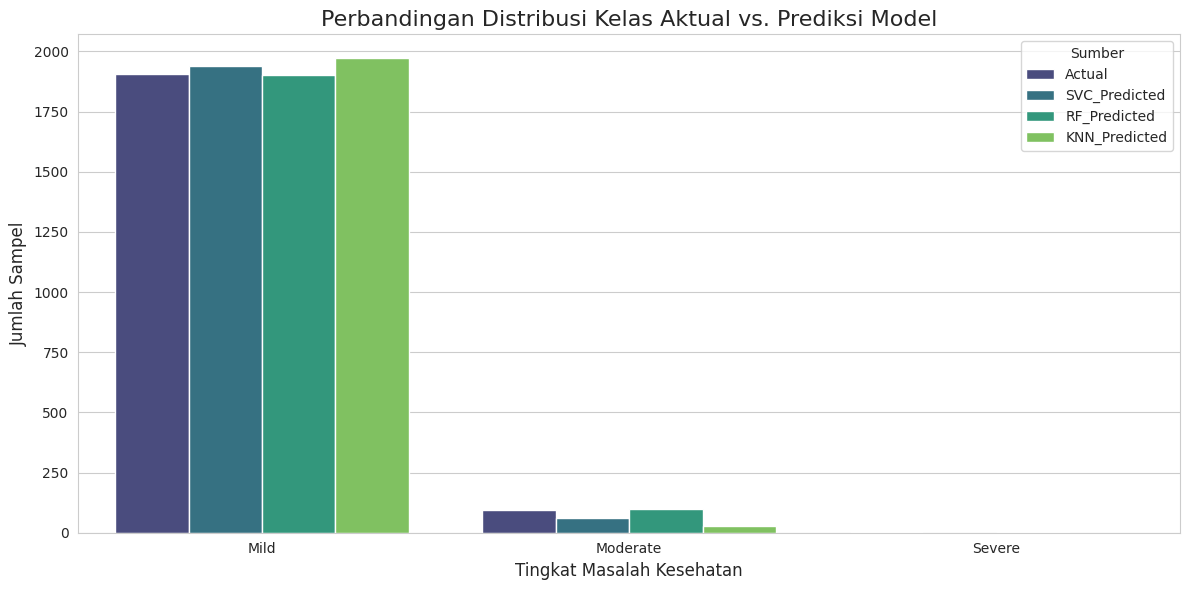

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

# Create dataframes for plotting class distributions
y_test_df = y_test.to_frame(name='Actual')
y_pred_svc_df = pd.DataFrame(y_pred_svc, columns=['SVC_Predicted'])
y_pred_rf_df = pd.DataFrame(y_pred_rf, columns=['RF_Predicted'])
y_pred_knn_df = pd.DataFrame(y_pred_knn, columns=['KNN_Predicted'])

# Combine actual and predicted values for plotting
combined_preds = pd.concat([y_test_df.reset_index(drop=True),
                            y_pred_svc_df,
                            y_pred_rf_df,
                            y_pred_knn_df], axis=1)

# Melt the dataframe for easier plotting with seaborn
melted_preds = combined_preds.melt(var_name='Source', value_name='Health_Issue')

# Create a countplot to compare class distributions
plt.figure(figsize=(12, 6))
sns.countplot(data=melted_preds, x='Health_Issue', hue='Source', palette='viridis')
plt.title('Perbandingan Distribusi Kelas Aktual vs. Prediksi Model', fontsize=16)
plt.xlabel('Tingkat Masalah Kesehatan', fontsize=12)
plt.ylabel('Jumlah Sampel', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Sumber')
plt.tight_layout()
plt.show()

**Reasoning**:
Buat heatmap dari Confusion Matrix untuk setiap model untuk memvisualisasikan kinerja per kelas secara detail.



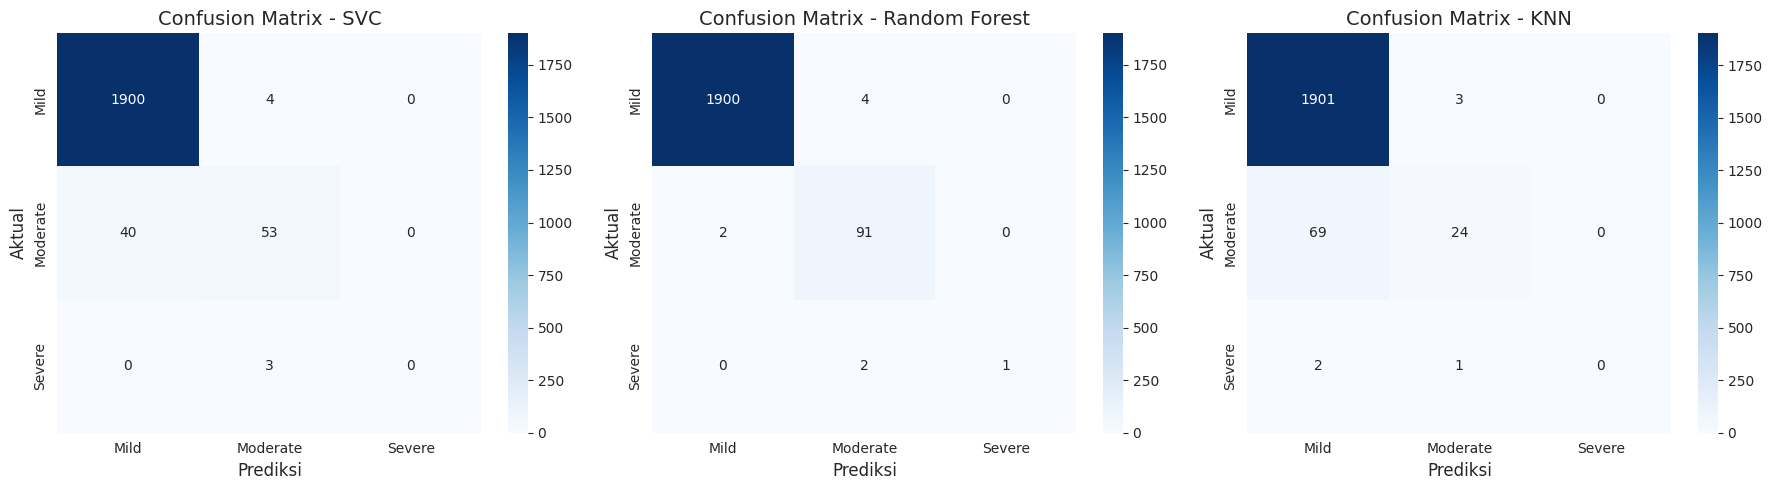

In [15]:
from sklearn.metrics import confusion_matrix

# Get the unique classes from the actual test data
classes = y_test.unique()
classes.sort() # Sort to ensure consistent order

# Calculate Confusion Matrices for each model
cm_svc = confusion_matrix(y_test, y_pred_svc, labels=classes)
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=classes)
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=classes)

# Create a figure with subplots for each heatmap
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Confusion Matrix for SVC
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=classes, yticklabels=classes)
axes[0].set_title('Confusion Matrix - SVC', fontsize=14)
axes[0].set_xlabel('Prediksi', fontsize=12)
axes[0].set_ylabel('Aktual', fontsize=12)

# Plot Confusion Matrix for Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1], xticklabels=classes, yticklabels=classes)
axes[1].set_title('Confusion Matrix - Random Forest', fontsize=14)
axes[1].set_xlabel('Prediksi', fontsize=12)
axes[1].set_ylabel('Aktual', fontsize=12)

# Plot Confusion Matrix for KNN
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[2], xticklabels=classes, yticklabels=classes)
axes[2].set_title('Confusion Matrix - KNN', fontsize=14)
axes[2].set_xlabel('Prediksi', fontsize=12)
axes[2].set_ylabel('Aktual', fontsize=12)

plt.tight_layout()
plt.show()

## Penjelasan markdown

### Subtask:
Buat sel markdown untuk menjelaskan setiap langkah, model yang digunakan, hasil evaluasi, dan interpretasi visualisasi dalam Bahasa Indonesia.


**Reasoning**:
Create a markdown cell to provide a comprehensive explanation of the entire process in Indonesian.



In [16]:
%%markdown
## Analisis Data dan Pemodelan Klasifikasi Kesehatan

Analisis ini bertujuan untuk memprediksi tingkat masalah kesehatan (`Health_Issues`) berdasarkan berbagai faktor terkait gaya hidup dan demografi menggunakan dataset `/content/synthetic_coffee_health_10000.csv`.

### Pengenalan Dataset dan Tugas

Dataset ini berisi informasi tentang 10.000 individu, mencakup kolom seperti usia, jenis kelamin, negara, konsumsi kopi dan kafein, jam tidur, BMI, detak jantung, tingkat stres, aktivitas fisik, pekerjaan, kebiasaan merokok, konsumsi alkohol, dan tingkat masalah kesehatan.

Dari eksplorasi data awal, kami menemukan bahwa kolom target `Health_Issues` bersifat kategorikal dengan tiga kategori: 'Mild', 'Moderate', dan 'Severe'. Selain itu, terdapat nilai yang hilang pada kolom ini. Karena target variabel bersifat kategorikal, tugas ini diklasifikasikan sebagai **masalah klasifikasi**.

### Pra-pemrosesan Data

Sebelum melatih model, data perlu dipersiapkan. Langkah-langkah pra-pemrosesan meliputi:

1.  **Penanganan Nilai yang Hilang:** Nilai yang hilang pada kolom target `Health_Issues` diisi (imputasi) menggunakan nilai yang paling sering muncul (modus) dari kolom tersebut.
2.  **Pemisahan Fitur dan Target:** Kolom `Health_Issues` dipisahkan sebagai variabel target (`y`), sementara kolom lainnya (kecuali kolom ID yang tidak relevan) digunakan sebagai fitur (`X`).
3.  **Encoding Variabel Kategorikal:** Fitur-fitur kategorikal seperti 'Gender', 'Country', 'Occupation', 'Smoking', 'Alcohol_Consumption', 'Sleep_Quality', dan 'Stress_Level' diubah menjadi format numerik menggunakan **One-Hot Encoding**. Proses ini membuat kolom biner baru untuk setiap kategori unik dalam fitur kategorikal.
4.  **Penskalaan Fitur Numerik:** Fitur-fitur numerik seperti 'Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', dan 'Physical_Activity_Hours' diskalakan menggunakan **StandardScaler**. Penskalaan ini memastikan bahwa fitur numerik memiliki rata-rata nol dan varians satu, mencegah fitur dengan rentang nilai yang besar mendominasi model.
5.  **Pembuatan Pipeline Pra-pemrosesan:** Sebuah `ColumnTransformer` dibuat untuk menggabungkan langkah encoding dan penskalaan, memastikan transformasi yang benar diterapkan pada jenis kolom yang sesuai.

### Pembagian Data

Data fitur (`X`) dan target (`y_imputed`) yang telah diproses dibagi menjadi set pelatihan (80%) dan set pengujian (20%) menggunakan fungsi `train_test_split`. Pembagian dilakukan secara stratifikasi (`stratify=y_imputed`) untuk memastikan bahwa distribusi kelas dari variabel target dipertahankan baik di set pelatihan maupun pengujian, yang penting karena adanya ketidakseimbangan kelas.

### Model Klasifikasi yang Digunakan

Kami mengimplementasikan tiga model klasifikasi:

1.  **Support Vector Classifier (SVC):** Model linier atau non-linier yang bekerja dengan menemukan hyperplane terbaik yang memisahkan kelas-kelas dalam ruang fitur.
2.  **Random Forest Classifier:** Model ansambel yang membangun banyak pohon keputusan selama pelatihan dan menghasilkan kelas yang merupakan modus dari prediksi kelas pohon individu.
3.  **K-Nearest Neighbors (KNN) Classifier:** Model non-parametrik yang mengklasifikasikan titik data baru berdasarkan mayoritas kelas dari 'k' tetangga terdekatnya dalam ruang fitur.

Setiap model digabungkan dengan pipeline pra-pemrosesan yang dibuat sebelumnya, membentuk pipeline lengkap untuk setiap model. Ini memastikan bahwa langkah pra-pemrosesan diterapkan secara konsisten pada data sebelum data dimasukkan ke dalam model.

### Pelatihan Model

Setiap pipeline model (SVC, Random Forest, dan KNN) dilatih menggunakan set data pelatihan (`X_train`, `y_train`). Proses pelatihan menyesuaikan parameter internal setiap model berdasarkan pola dalam data pelatihan untuk dapat membuat prediksi pada data baru.

### Evaluasi Model

Kinerja setiap model klasifikasi dievaluasi menggunakan metrik berikut pada set data pengujian (`X_test`, `y_test`):

*   **Confusion Matrix:** Tabel yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas. Ini membantu mengidentifikasi jenis kesalahan yang dibuat model (misalnya, salah memprediksi 'Moderate' as 'Mild').
*   **Classification Report:** Menyediakan ringkasan metrik per kelas:
    *   **Precision:** Proporsi prediksi positif yang sebenarnya benar.
    *   **Recall:** Proporsi positif aktual yang berhasil diidentifikasi.
    *   **F1-Score:** Rata-rata harmonis dari Precision dan Recall, berguna untuk menangani ketidakseimbangan kelas.
    *   **Support:** Jumlah sampel aktual dalam setiap kelas di set pengujian.
*   **Overall Accuracy:** Proporsi total prediksi yang benar.

Penjelasan mendalam mengenai metrik-metrik ini telah disediakan dalam sel markdown sebelumnya.

### Interpretasi Visualisasi Hasil Prediksi

Dua jenis visualisasi telah dibuat:

1.  **Perbandingan Distribusi Kelas Aktual vs. Prediksi Model:** Plot batang ini secara visual membandingkan jumlah sampel di setiap kelas ('Mild', 'Moderate', 'Severe') antara data uji aktual dan hasil prediksi dari ketiga model. Plot ini menunjukkan seberapa baik setiap model mereplikasi distribusi kelas aktual. Kita dapat melihat bahwa kelas 'Severe' adalah minoritas yang signifikan, dan mungkin sulit bagi model untuk memprediksi kelas ini dengan tepat. Model cenderung memprediksi kelas mayoritas ('Mild') lebih sering.

2.  **Heatmap Confusion Matrix:** Heatmap ini menampilkan Confusion Matrix untuk setiap model. Warna yang lebih gelap menunjukkan jumlah sampel yang lebih banyak. Diagonal utama (dari kiri atas ke kanan bawah) mewakili prediksi yang benar (True Positives), sementara sel di luar diagonal utama mewakili kesalahan prediksi (False Positives dan False Negatives).
    *   Dari heatmap SVC dan KNN, terlihat bahwa mereka kesulitan memprediksi kelas 'Severe', dengan sedikit atau tanpa True Positives untuk kelas ini. Mereka cenderung salah mengklasifikasikan sampel 'Severe' sebagai 'Mild' atau 'Moderate'.
    *   Random Forest menunjukkan kinerja yang sedikit lebih baik dalam mengidentifikasi kelas 'Moderate', meskipun masih ada kesalahan, terutama dalam memprediksi kelas minoritas 'Severe'.

Secara keseluruhan, visualisasi mengkonfirmasi temuan dari Classification Report bahwa model memiliki tantangan dalam mengklasifikasikan kelas minoritas ('Severe') dengan akurat, yang kemungkinan disebabkan oleh ketidakseimbangan kelas dalam dataset. Random Forest tampaknya menunjukkan kinerja terbaik di antara ketiga model, terutama untuk kelas 'Moderate', tetapi klasifikasi 'Severe' tetap sulit.

SyntaxError: invalid syntax (ipython-input-833996921.py, line 1)

**Reasoning**:
The previous attempt to create a markdown cell using `code_block` failed due to a `SyntaxError`. The correct way to create a markdown cell in this environment is using the `%%markdown` magic command at the beginning of the cell.



In [17]:
%%markdown
## Analisis Data dan Pemodelan Klasifikasi Kesehatan

Analisis ini bertujuan untuk memprediksi tingkat masalah kesehatan (`Health_Issues`) berdasarkan berbagai faktor terkait gaya hidup dan demografi menggunakan dataset `/content/synthetic_coffee_health_10000.csv`.

### Pengenalan Dataset dan Tugas

Dataset ini berisi informasi tentang 10.000 individu, mencakup kolom seperti usia, jenis kelamin, negara, konsumsi kopi dan kafein, jam tidur, BMI, detak jantung, tingkat stres, aktivitas fisik, pekerjaan, kebiasaan merokok, konsumsi alkohol, dan tingkat masalah kesehatan.

Dari eksplorasi data awal, kami menemukan bahwa kolom target `Health_Issues` bersifat kategorikal dengan tiga kategori: 'Mild', 'Moderate', dan 'Severe'. Selain itu, terdapat nilai yang hilang pada kolom ini. Karena target variabel bersifat kategorikal, tugas ini diklasifikasikan sebagai **masalah klasifikasi**.

### Pra-pemrosesan Data

Sebelum melatih model, data perlu dipersiapkan. Langkah-langkah pra-pemrosesan meliputi:

1.  **Penanganan Nilai yang Hilang:** Nilai yang hilang pada kolom target `Health_Issues` diisi (imputasi) menggunakan nilai yang paling sering muncul (modus) dari kolom tersebut.
2.  **Pemisahan Fitur dan Target:** Kolom `Health_Issues` dipisahkan sebagai variabel target (`y`), sementara kolom lainnya (kecuali kolom ID yang tidak relevan) digunakan sebagai fitur (`X`).
3.  **Encoding Variabel Kategorikal:** Fitur-fitur kategorikal seperti 'Gender', 'Country', 'Occupation', 'Smoking', 'Alcohol_Consumption', 'Sleep_Quality', dan 'Stress_Level' diubah menjadi format numerik menggunakan **One-Hot Encoding**. Proses ini membuat kolom biner baru untuk setiap kategori unik dalam fitur kategorikal.
4.  **Penskalaan Fitur Numerik:** Fitur-fitur numerik seperti 'Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', dan 'Physical_Activity_Hours' diskalakan menggunakan **StandardScaler**. Penskalaan ini memastikan bahwa fitur numerik memiliki rata-rata nol dan varians satu, mencegah fitur dengan rentang nilai yang besar mendominasi model.
5.  **Pembuatan Pipeline Pra-pemrosesan:** Sebuah `ColumnTransformer` dibuat untuk menggabungkan langkah encoding dan penskalaan, memastikan transformasi yang benar diterapkan pada jenis kolom yang sesuai.

### Pembagian Data

Data fitur (`X`) dan target (`y_imputed`) yang telah diproses dibagi menjadi set pelatihan (80%) dan set pengujian (20%) menggunakan fungsi `train_test_split`. Pembagian dilakukan secara stratifikasi (`stratify=y_imputed`) untuk memastikan bahwa distribusi kelas dari variabel target dipertahankan baik di set pelatihan maupun pengujian, yang penting karena adanya ketidakseimbangan kelas.

### Model Klasifikasi yang Digunakan

Kami mengimplementasikan tiga model klasifikasi:

1.  **Support Vector Classifier (SVC):** Model linier atau non-linier yang bekerja dengan menemukan hyperplane terbaik yang memisahkan kelas-kelas dalam ruang fitur.
2.  **Random Forest Classifier:** Model ansambel yang membangun banyak pohon keputusan selama pelatihan dan menghasilkan kelas yang merupakan modus dari prediksi kelas pohon individu.
3.  **K-Nearest Neighbors (KNN) Classifier:** Model non-parametrik yang mengklasifikasikan titik data baru berdasarkan mayoritas kelas dari 'k' tetangga terdekatnya dalam ruang fitur.

Setiap model digabungkan dengan pipeline pra-pemrosesan yang dibuat sebelumnya, membentuk pipeline lengkap untuk setiap model. Ini memastikan bahwa langkah pra-pemrosesan diterapkan secara konsisten pada data sebelum data dimasukkan ke dalam model.

### Pelatihan Model

Setiap pipeline model (SVC, Random Forest, dan KNN) dilatih menggunakan set data pelatihan (`X_train`, `y_train`). Proses pelatihan menyesuaikan parameter internal setiap model berdasarkan pola dalam data pelatihan untuk dapat membuat prediksi pada data baru.

### Evaluasi Model

Kinerja setiap model klasifikasi dievaluasi menggunakan metrik berikut pada set data pengujian (`X_test`, `y_test`):

*   **Confusion Matrix:** Tabel yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas. Ini membantu mengidentifikasi jenis kesalahan yang dibuat model (misalnya, salah memprediksi 'Moderate' sebagai 'Mild').
*   **Classification Report:** Menyediakan ringkasan metrik per kelas:
    *   **Precision:** Proporsi prediksi positif yang sebenarnya benar.
    *   **Recall:** Proporsi positif aktual yang berhasil diidentifikasi.
    *   **F1-Score:** Rata-rata harmonis dari Precision dan Recall, berguna untuk menangani ketidakseimbangan kelas.
    *   **Support:** Jumlah sampel aktual dalam setiap kelas di set pengujian.
*   **Overall Accuracy:** Proporsi total prediksi yang benar.

Penjelasan mendalam mengenai metrik-metrik ini telah disediakan dalam sel markdown sebelumnya.

### Interpretasi Visualisasi Hasil Prediksi

Dua jenis visualisasi telah dibuat:

1.  **Perbandingan Distribusi Kelas Aktual vs. Prediksi Model:** Plot batang ini secara visual membandingkan jumlah sampel di setiap kelas ('Mild', 'Moderate', 'Severe') antara data uji aktual dan hasil prediksi dari ketiga model. Plot ini menunjukkan seberapa baik setiap model mereplikasi distribusi kelas aktual. Kita dapat melihat bahwa kelas 'Severe' adalah minoritas yang signifikan, dan mungkin sulit bagi model untuk memprediksi kelas ini dengan tepat. Model cenderung memprediksi kelas mayoritas ('Mild') lebih sering.

2.  **Heatmap Confusion Matrix:** Heatmap ini menampilkan Confusion Matrix untuk setiap model. Warna yang lebih gelap menunjukkan jumlah sampel yang lebih banyak. Diagonal utama (dari kiri atas ke kanan bawah) mewakili prediksi yang benar (True Positives), sementara sel di luar diagonal utama mewakili kesalahan prediksi (False Positives dan False Negatives).
    *   Dari heatmap SVC dan KNN, terlihat bahwa mereka kesulitan memprediksi kelas 'Severe', dengan sedikit atau tanpa True Positives untuk kelas ini. Mereka cenderung salah mengklasifikasikan sampel 'Severe' sebagai 'Mild' atau 'Moderate'.
    *   Random Forest menunjukkan kinerja yang sedikit lebih baik dalam mengidentifikasi kelas 'Moderate', meskipun masih ada kesalahan, terutama dalam memprediksi kelas minoritas 'Severe'.

Secara keseluruhan, visualisasi mengkonfirmasi temuan dari Classification Report bahwa model memiliki tantangan dalam mengklasifikasikan kelas minoritas ('Severe') dengan akurat, yang kemungkinan disebabkan oleh ketidakseimbangan kelas dalam dataset. Random Forest tampaknya menunjukkan kinerja terbaik di antara ketiga model, terutama untuk kelas 'Moderate', tetapi klasifikasi 'Severe' tetap sulit.

## Analisis Data dan Pemodelan Klasifikasi Kesehatan

Analisis ini bertujuan untuk memprediksi tingkat masalah kesehatan (`Health_Issues`) berdasarkan berbagai faktor terkait gaya hidup dan demografi menggunakan dataset `/content/synthetic_coffee_health_10000.csv`.

### Pengenalan Dataset dan Tugas

Dataset ini berisi informasi tentang 10.000 individu, mencakup kolom seperti usia, jenis kelamin, negara, konsumsi kopi dan kafein, jam tidur, BMI, detak jantung, tingkat stres, aktivitas fisik, pekerjaan, kebiasaan merokok, konsumsi alkohol, dan tingkat masalah kesehatan.

Dari eksplorasi data awal, kami menemukan bahwa kolom target `Health_Issues` bersifat kategorikal dengan tiga kategori: 'Mild', 'Moderate', dan 'Severe'. Selain itu, terdapat nilai yang hilang pada kolom ini. Karena target variabel bersifat kategorikal, tugas ini diklasifikasikan sebagai **masalah klasifikasi**.

### Pra-pemrosesan Data

Sebelum melatih model, data perlu dipersiapkan. Langkah-langkah pra-pemrosesan meliputi:

1.  **Penanganan Nilai yang Hilang:** Nilai yang hilang pada kolom target `Health_Issues` diisi (imputasi) menggunakan nilai yang paling sering muncul (modus) dari kolom tersebut.
2.  **Pemisahan Fitur dan Target:** Kolom `Health_Issues` dipisahkan sebagai variabel target (`y`), sementara kolom lainnya (kecuali kolom ID yang tidak relevan) digunakan sebagai fitur (`X`).
3.  **Encoding Variabel Kategorikal:** Fitur-fitur kategorikal seperti 'Gender', 'Country', 'Occupation', 'Smoking', 'Alcohol_Consumption', 'Sleep_Quality', dan 'Stress_Level' diubah menjadi format numerik menggunakan **One-Hot Encoding**. Proses ini membuat kolom biner baru untuk setiap kategori unik dalam fitur kategorikal.
4.  **Penskalaan Fitur Numerik:** Fitur-fitur numerik seperti 'Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', dan 'Physical_Activity_Hours' diskalakan menggunakan **StandardScaler**. Penskalaan ini memastikan bahwa fitur numerik memiliki rata-rata nol dan varians satu, mencegah fitur dengan rentang nilai yang besar mendominasi model.
5.  **Pembuatan Pipeline Pra-pemrosesan:** Sebuah `ColumnTransformer` dibuat untuk menggabungkan langkah encoding dan penskalaan, memastikan transformasi yang benar diterapkan pada jenis kolom yang sesuai.

### Pembagian Data

Data fitur (`X`) dan target (`y_imputed`) yang telah diproses dibagi menjadi set pelatihan (80%) dan set pengujian (20%) menggunakan fungsi `train_test_split`. Pembagian dilakukan secara stratifikasi (`stratify=y_imputed`) untuk memastikan bahwa distribusi kelas dari variabel target dipertahankan baik di set pelatihan maupun pengujian, yang penting karena adanya ketidakseimbangan kelas.

### Model Klasifikasi yang Digunakan

Kami mengimplementasikan tiga model klasifikasi:

1.  **Support Vector Classifier (SVC):** Model linier atau non-linier yang bekerja dengan menemukan hyperplane terbaik yang memisahkan kelas-kelas dalam ruang fitur.
2.  **Random Forest Classifier:** Model ansambel yang membangun banyak pohon keputusan selama pelatihan dan menghasilkan kelas yang merupakan modus dari prediksi kelas pohon individu.
3.  **K-Nearest Neighbors (KNN) Classifier:** Model non-parametrik yang mengklasifikasikan titik data baru berdasarkan mayoritas kelas dari 'k' tetangga terdekatnya dalam ruang fitur.

Setiap model digabungkan dengan pipeline pra-pemrosesan yang dibuat sebelumnya, membentuk pipeline lengkap untuk setiap model. Ini memastikan bahwa langkah pra-pemrosesan diterapkan secara konsisten pada data sebelum data dimasukkan ke dalam model.

### Pelatihan Model

Setiap pipeline model (SVC, Random Forest, dan KNN) dilatih menggunakan set data pelatihan (`X_train`, `y_train`). Proses pelatihan menyesuaikan parameter internal setiap model berdasarkan pola dalam data pelatihan untuk dapat membuat prediksi pada data baru.

### Evaluasi Model

Kinerja setiap model klasifikasi dievaluasi menggunakan metrik berikut pada set data pengujian (`X_test`, `y_test`):

*   **Confusion Matrix:** Tabel yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas. Ini membantu mengidentifikasi jenis kesalahan yang dibuat model (misalnya, salah memprediksi 'Moderate' sebagai 'Mild').
*   **Classification Report:** Menyediakan ringkasan metrik per kelas:
    *   **Precision:** Proporsi prediksi positif yang sebenarnya benar.
    *   **Recall:** Proporsi positif aktual yang berhasil diidentifikasi.
    *   **F1-Score:** Rata-rata harmonis dari Precision dan Recall, berguna untuk menangani ketidakseimbangan kelas.
    *   **Support:** Jumlah sampel aktual dalam setiap kelas di set pengujian.
*   **Overall Accuracy:** Proporsi total prediksi yang benar.

Penjelasan mendalam mengenai metrik-metrik ini telah disediakan dalam sel markdown sebelumnya.

### Interpretasi Visualisasi Hasil Prediksi

Dua jenis visualisasi telah dibuat:

1.  **Perbandingan Distribusi Kelas Aktual vs. Prediksi Model:** Plot batang ini secara visual membandingkan jumlah sampel di setiap kelas ('Mild', 'Moderate', 'Severe') antara data uji aktual dan hasil prediksi dari ketiga model. Plot ini menunjukkan seberapa baik setiap model mereplikasi distribusi kelas aktual. Kita dapat melihat bahwa kelas 'Severe' adalah minoritas yang signifikan, dan mungkin sulit bagi model untuk memprediksi kelas ini dengan tepat. Model cenderung memprediksi kelas mayoritas ('Mild') lebih sering.

2.  **Heatmap Confusion Matrix:** Heatmap ini menampilkan Confusion Matrix untuk setiap model. Warna yang lebih gelap menunjukkan jumlah sampel yang lebih banyak. Diagonal utama (dari kiri atas ke kanan bawah) mewakili prediksi yang benar (True Positives), sementara sel di luar diagonal utama mewakili kesalahan prediksi (False Positives dan False Negatives).
    *   Dari heatmap SVC dan KNN, terlihat bahwa mereka kesulitan memprediksi kelas 'Severe', dengan sedikit atau tanpa True Positives untuk kelas ini. Mereka cenderung salah mengklasifikasikan sampel 'Severe' sebagai 'Mild' atau 'Moderate'.
    *   Random Forest menunjukkan kinerja yang sedikit lebih baik dalam mengidentifikasi kelas 'Moderate', meskipun masih ada kesalahan, terutama dalam memprediksi kelas minoritas 'Severe'.

Secara keseluruhan, visualisasi mengkonfirmasi temuan dari Classification Report bahwa model memiliki tantangan dalam mengklasifikasikan kelas minoritas ('Severe') dengan akurat, yang kemungkinan disebabkan oleh ketidakseimbangan kelas dalam dataset. Random Forest tampaknya menunjukkan kinerja terbaik di antara ketiga model, terutama untuk kelas 'Moderate', tetapi klasifikasi 'Severe' tetap sulit.


## Summary:

### Data Analysis Key Findings

*   Dataset yang digunakan adalah `synthetic_coffee_health_10000.csv` berisi 10.000 entri dan 16 kolom.
*   Variabel target, 'Health_Issues', bersifat kategorikal dengan tiga kelas: 'Mild', 'Moderate', dan 'Severe', mengindikasikan ini adalah tugas klasifikasi.
*   Kolom 'Health_Issues' memiliki nilai yang hilang dan diimputasi dengan modus ('Mild').
*   Fitur-fitur pra-pemrosesan termasuk One-Hot Encoding untuk kolom kategorikal ('Gender', 'Country', 'Occupation', 'Smoking', 'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level') dan Standard Scaling untuk kolom numerik ('Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours').
*   Data dibagi menjadi 80% untuk pelatihan dan 20% untuk pengujian secara stratifikasi untuk menjaga distribusi kelas target.
*   Tiga model klasifikasi diimplementasikan dan dilatih: Support Vector Classifier (SVC), Random Forest Classifier (RF), dan K-Nearest Neighbors (KNN).
*   Evaluasi menggunakan Confusion Matrix dan Classification Report menunjukkan bahwa semua model berkinerja baik pada kelas mayoritas ('Mild') tetapi memiliki kesulitan signifikan dalam mengklasifikasikan kelas minoritas ('Severe'), dengan SVC dan KNN bahkan tidak memprediksi kelas 'Severe' sama sekali. Random Forest menunjukkan kinerja terbaik di antara ketiganya, terutama dalam mengklasifikasikan kelas 'Moderate'.
*   Visualisasi distribusi kelas menunjukkan ketidakseimbangan kelas yang parah, dengan 'Mild' menjadi kelas yang paling dominan.
*   Heatmap Confusion Matrix secara visual mengkonfirmasi kesulitan model dalam memprediksi kelas minoritas, terutama 'Severe'.

### Insights or Next Steps

*   Ketidakseimbangan kelas yang signifikan pada kolom target ('Health_Issues') adalah tantangan utama. Strategi penanganan ketidakseimbangan kelas seperti oversampling minoritas (misalnya SMOTE) atau undersampling mayoritas harus dipertimbangkan di masa depan.
*   Eksplorasi lebih lanjut terhadap hyperparameter tuning untuk setiap model, terutama Random Forest yang menunjukkan kinerja terbaik, dapat meningkatkan kinerja klasifikasi pada kelas minoritas.
